In [1]:
spark = SparkSession.builder \
        .master("local") \
        .appName("RecommendationEngine") \
        .config("spark.executor.memory", "6gb") \
        .getOrCreate()

In [2]:
import os
os.listdir('ml-latest-small/')

['movies.csv', 'links.csv', 'README.txt', 'tags.csv', 'ratings.csv']

In [3]:
movies = spark.read.format('com.databricks.spark.csv')\
            .options(header='true', inferschema='true')\
            .load('ml-latest-small/movies.csv')
tags = spark.read.format('com.databricks.spark.csv')\
            .options(header='true', inferschema='true')\
            .load('ml-latest-small/tags.csv')
links = spark.read.format('com.databricks.spark.csv')\
            .options(header='true', inferschema='true')\
            .load('ml-latest-small/links.csv')
ratings = spark.read.format('com.databricks.spark.csv')\
            .options(header='true', inferschema='true')\
            .load('ml-latest-small/ratings.csv')

In [4]:
ratings.columns

['userId', 'movieId', 'rating', 'timestamp']

In [5]:
ratings.show(truncate=False)

+------+-------+------+---------+
|userId|movieId|rating|timestamp|
+------+-------+------+---------+
|1     |1      |4.0   |964982703|
|1     |3      |4.0   |964981247|
|1     |6      |4.0   |964982224|
|1     |47     |5.0   |964983815|
|1     |50     |5.0   |964982931|
|1     |70     |3.0   |964982400|
|1     |101    |5.0   |964980868|
|1     |110    |4.0   |964982176|
|1     |151    |5.0   |964984041|
|1     |157    |5.0   |964984100|
|1     |163    |5.0   |964983650|
|1     |216    |5.0   |964981208|
|1     |223    |3.0   |964980985|
|1     |231    |5.0   |964981179|
|1     |235    |4.0   |964980908|
|1     |260    |5.0   |964981680|
|1     |296    |3.0   |964982967|
|1     |316    |3.0   |964982310|
|1     |333    |5.0   |964981179|
|1     |349    |4.0   |964982563|
+------+-------+------+---------+
only showing top 20 rows



In [6]:
tags.show(truncate = False)

+------+-------+-----------------+----------+
|userId|movieId|tag              |timestamp |
+------+-------+-----------------+----------+
|2     |60756  |funny            |1445714994|
|2     |60756  |Highly quotable  |1445714996|
|2     |60756  |will ferrell     |1445714992|
|2     |89774  |Boxing story     |1445715207|
|2     |89774  |MMA              |1445715200|
|2     |89774  |Tom Hardy        |1445715205|
|2     |106782 |drugs            |1445715054|
|2     |106782 |Leonardo DiCaprio|1445715051|
|2     |106782 |Martin Scorsese  |1445715056|
|7     |48516  |way too long     |1169687325|
|18    |431    |Al Pacino        |1462138765|
|18    |431    |gangster         |1462138749|
|18    |431    |mafia            |1462138755|
|18    |1221   |Al Pacino        |1461699306|
|18    |1221   |Mafia            |1461699303|
|18    |5995   |holocaust        |1455735472|
|18    |5995   |true story       |1455735479|
|18    |44665  |twist ending     |1456948283|
|18    |52604  |Anthony Hopkins  |

In [7]:
movies.select('genres').distinct().show(truncate = False)

+------------------------------------------+
|genres                                    |
+------------------------------------------+
|Comedy|Horror|Thriller                    |
|Adventure|Sci-Fi|Thriller                 |
|Action|Adventure|Drama|Fantasy            |
|Action|Drama|Horror                       |
|Action|Animation|Comedy|Sci-Fi            |
|Animation|Children|Drama|Musical|Romance  |
|Action|Adventure|Drama                    |
|Adventure|Sci-Fi                          |
|Documentary|Musical|IMAX                  |
|Adventure|Children|Fantasy|Sci-Fi|Thriller|
|Adventure|Animation                       |
|Musical|Romance|War                       |
|Action|Adventure|Fantasy|Romance          |
|Adventure|Children|Drama|Fantasy|IMAX     |
|Comedy|Crime|Horror|Thriller              |
|Crime|Drama|Fantasy|Horror|Thriller       |
|Comedy|Mystery|Thriller                   |
|Adventure|Fantasy                         |
|Horror|Romance|Sci-Fi                     |
|Drama|Fil

In [8]:
links.show()

+-------+------+------+
|movieId|imdbId|tmdbId|
+-------+------+------+
|      1|114709|   862|
|      2|113497|  8844|
|      3|113228| 15602|
|      4|114885| 31357|
|      5|113041| 11862|
|      6|113277|   949|
|      7|114319| 11860|
|      8|112302| 45325|
|      9|114576|  9091|
|     10|113189|   710|
|     11|112346|  9087|
|     12|112896| 12110|
|     13|112453| 21032|
|     14|113987| 10858|
|     15|112760|  1408|
|     16|112641|   524|
|     17|114388|  4584|
|     18|113101|     5|
|     19|112281|  9273|
|     20|113845| 11517|
+-------+------+------+
only showing top 20 rows



In [9]:
print('The number of rows in movies dataset is {}'.format(movies.toPandas().shape[0]))
print('The number of rows in ratings dataset is {}'.format(ratings.toPandas().shape[0]))
print('The number of rows in tags dataset is {}'.format(tags.toPandas().shape[0]))
print('The number of rows in links dataset is {}'.format(links.toPandas().shape[0]))

The number of rows in movies dataset is 9742
The number of rows in ratings dataset is 100836
The number of rows in tags dataset is 3683
The number of rows in links dataset is 9742


In [10]:
for i in ratings.columns:
    ratings = ratings.withColumnRenamed(i, i+'_1')

In [11]:
ratings.show()

+--------+---------+--------+-----------+
|userId_1|movieId_1|rating_1|timestamp_1|
+--------+---------+--------+-----------+
|       1|        1|     4.0|  964982703|
|       1|        3|     4.0|  964981247|
|       1|        6|     4.0|  964982224|
|       1|       47|     5.0|  964983815|
|       1|       50|     5.0|  964982931|
|       1|       70|     3.0|  964982400|
|       1|      101|     5.0|  964980868|
|       1|      110|     4.0|  964982176|
|       1|      151|     5.0|  964984041|
|       1|      157|     5.0|  964984100|
|       1|      163|     5.0|  964983650|
|       1|      216|     5.0|  964981208|
|       1|      223|     3.0|  964980985|
|       1|      231|     5.0|  964981179|
|       1|      235|     4.0|  964980908|
|       1|      260|     5.0|  964981680|
|       1|      296|     3.0|  964982967|
|       1|      316|     3.0|  964982310|
|       1|      333|     5.0|  964981179|
|       1|      349|     4.0|  964982563|
+--------+---------+--------+-----

In [12]:
temp1 = ratings.join(movies, ratings.movieId_1 == movies.movieId, how = 'inner')

In [13]:
temp2 = temp1.join(links, temp1.movieId_1 == links.movieId, how = 'inner')

In [14]:
mainDF = temp2.join(tags, (temp2.userId_1 == tags.userId) & 
                    (temp2.movieId_1 == tags.movieId), how = 'left')

In [15]:
print(temp1.count())
print(temp2.count())
print(mainDF.count())

100836
100836
102677


In [16]:
mainDF.groupBy(['tag']).agg({'rating_1':'count'})\
            .withColumnRenamed('count(rating_1)', 'Row Count')\
            .orderBy(["Row Count"],ascending=False)\
            .show()

+------------------+---------+
|               tag|Row Count|
+------------------+---------+
|              null|    99201|
|  In Netflix queue|       55|
|       atmospheric|       36|
|             funny|       23|
|            Disney|       23|
|         superhero|       23|
|           surreal|       23|
|          religion|       22|
| thought-provoking|       22|
|            quirky|       21|
|        psychology|       20|
|       dark comedy|       20|
|          suspense|       19|
|      twist ending|       19|
|visually appealing|       19|
|             crime|       18|
|          politics|       18|
|             music|       16|
|    mental illness|       16|
|       time travel|       15|
+------------------+---------+
only showing top 20 rows



In [17]:
mainDF.columns

['userId_1',
 'movieId_1',
 'rating_1',
 'timestamp_1',
 'movieId',
 'title',
 'genres',
 'movieId',
 'imdbId',
 'tmdbId',
 'userId',
 'movieId',
 'tag',
 'timestamp']

In [18]:
mainDF = mainDF.select('userId_1',
                       'movieId_1',
                       'rating_1',
                       'title',
                       'genres',
                       'imdbId',
                       'tmdbId',
                       'timestamp_1').distinct()

In [19]:
mainDF.count()

100836

In [20]:
movies.createOrReplaceTempView('movies_')
links.createOrReplaceTempView('links_')
ratings.createOrReplaceTempView('ratings_')

In [21]:
mainDF_SQL = \
sqlContext.sql(
"""
select
r.userId_1
,r.movieId_1
,r.rating_1
,m.title
,m.genres
,l.imdbId
,l.tmdbId
,r.timestamp_1
from ratings_ r
inner join movies_ m on
r.movieId_1 = m.movieId
inner join links_ l on
r.movieId_1 = l.movieId
"""
)

In [22]:
mainDF_SQL.show(n = 5)

+--------+---------+--------+--------------------+--------------------+------+------+-----------+
|userId_1|movieId_1|rating_1|               title|              genres|imdbId|tmdbId|timestamp_1|
+--------+---------+--------+--------------------+--------------------+------+------+-----------+
|       1|        1|     4.0|    Toy Story (1995)|Adventure|Animati...|114709|   862|  964982703|
|       1|        3|     4.0|Grumpier Old Men ...|      Comedy|Romance|113228| 15602|  964981247|
|       1|        6|     4.0|         Heat (1995)|Action|Crime|Thri...|113277|   949|  964982224|
|       1|       47|     5.0|Seven (a.k.a. Se7...|    Mystery|Thriller|114369|   807|  964983815|
|       1|       50|     5.0|Usual Suspects, T...|Crime|Mystery|Thr...|114814|   629|  964982931|
+--------+---------+--------+--------------------+--------------------+------+------+-----------+
only showing top 5 rows



In [23]:
mainDF_SQL.count()

100836

In [24]:
mainDF.describe('rating_1').show()

+-------+------------------+
|summary|          rating_1|
+-------+------------------+
|  count|            100836|
|   mean| 3.501556983616962|
| stddev|1.0425292390606355|
|    min|               0.5|
|    max|               5.0|
+-------+------------------+



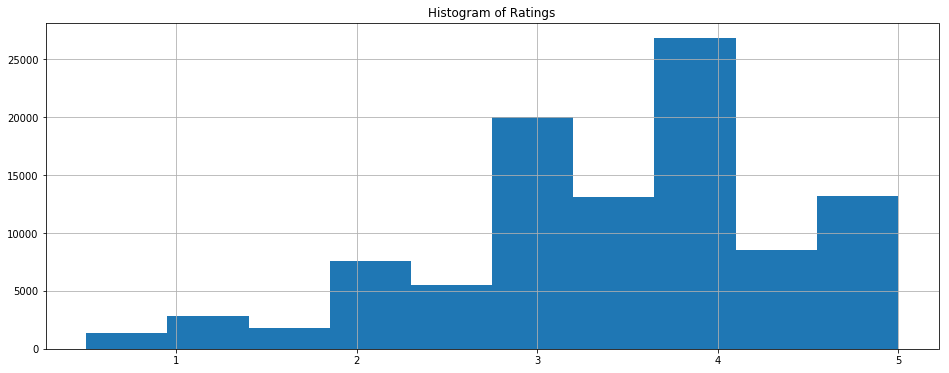

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

mainDF.select('rating_1').toPandas().hist(figsize=(16, 6), grid=True)
plt.title('Histogram of Ratings')
plt.show()

In [26]:
mainDF.groupBy(['rating_1']).agg({'rating_1':'count'})\
            .withColumnRenamed('count(rating_1)', 'Row Count')\
            .orderBy(["Row Count"],ascending=False)\
            .show()

+--------+---------+
|rating_1|Row Count|
+--------+---------+
|     4.0|    26818|
|     3.0|    20047|
|     5.0|    13211|
|     3.5|    13136|
|     4.5|     8551|
|     2.0|     7551|
|     2.5|     5550|
|     1.0|     2811|
|     1.5|     1791|
|     0.5|     1370|
+--------+---------+



In [27]:
userId_frequency = mainDF.groupBy(['userId_1']).agg({'rating_1':'count'})\
            .withColumnRenamed('count(rating_1)', '# of Reviews')\
            .orderBy(["# of Reviews"],ascending=False)

In [28]:
userId_frequency.show()

+--------+------------+
|userId_1|# of Reviews|
+--------+------------+
|     414|        2698|
|     599|        2478|
|     474|        2108|
|     448|        1864|
|     274|        1346|
|     610|        1302|
|      68|        1260|
|     380|        1218|
|     606|        1115|
|     288|        1055|
|     249|        1046|
|     387|        1027|
|     182|         977|
|     307|         975|
|     603|         943|
|     298|         939|
|     177|         904|
|     318|         879|
|     232|         862|
|     480|         836|
+--------+------------+
only showing top 20 rows



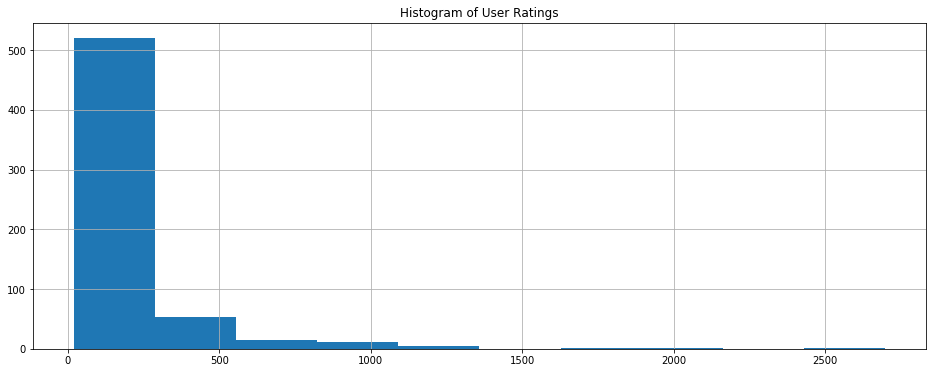

In [29]:
userId_frequency.select('# of Reviews').toPandas().hist(figsize=(16, 6), grid=True)
plt.title('Histogram of User Ratings')
plt.show()

In [30]:
mainDF = mainDF.withColumnRenamed('userId_1', 'userid')
mainDF = mainDF.withColumnRenamed('movieId_1', 'movieid')
mainDF = mainDF.withColumnRenamed('rating_1', 'rating')
mainDF = mainDF.withColumnRenamed('timestamp_1', 'timestamp')
mainDF = mainDF.withColumnRenamed('imdbId', 'imdbid')
mainDF = mainDF.withColumnRenamed('tmdbId', 'tmdbid')

In [31]:
mainDF.columns

['userid',
 'movieid',
 'rating',
 'title',
 'genres',
 'imdbid',
 'tmdbid',
 'timestamp']

In [32]:
import pyspark.sql.functions as F
mainDF = mainDF.withColumn("rating", F.round(mainDF["rating"], 0))

In [33]:
from pyspark.ml.feature import StringIndexer
string_indexer = StringIndexer(inputCol="genres",outputCol="genreCount")
mainDF = string_indexer.fit(mainDF).transform(mainDF)
mainDF.show()

+------+-------+------+--------------------+--------------------+-------+------+----------+----------+
|userid|movieid|rating|               title|              genres| imdbid|tmdbid| timestamp|genreCount|
+------+-------+------+--------------------+--------------------+-------+------+----------+----------+
|     1|   2054|   4.0|Honey, I Shrunk t...|Adventure|Childre...|  97523|  9354| 964981747|     229.0|
|     4|   2109|   4.0|    Jerk, The (1979)|              Comedy|  79367|  6471| 986935016|       0.0|
|     6|    364|   5.0|Lion King, The (1...|Adventure|Animati...| 110357|  8587| 845553317|     114.0|
|     6|    480|   5.0|Jurassic Park (1993)|Action|Adventure|...| 107290|   329| 845553200|      10.0|
|     7|  45730|   1.0|Lady in the Water...|Drama|Fantasy|Mys...| 452637|  9697|1161738279|     534.0|
|     9|   5893|   4.0|Last Seduction, T...|Crime|Drama|Thriller| 110308| 25284|1044657144|      14.0|
|    10|   4306|   5.0|        Shrek (2001)|Adventure|Animati...| 126029|

In [34]:
mainDF = mainDF.select('rating', 'userid', 'movieid', 'imdbid', 
                       'tmdbid', 'timestamp', 'genreCount')

In [35]:
mainDF.show()

+------+------+-------+-------+------+----------+----------+
|rating|userid|movieid| imdbid|tmdbid| timestamp|genreCount|
+------+------+-------+-------+------+----------+----------+
|   4.0|     1|   2054|  97523|  9354| 964981747|     229.0|
|   4.0|     4|   2109|  79367|  6471| 986935016|       0.0|
|   5.0|     6|    364| 110357|  8587| 845553317|     114.0|
|   5.0|     6|    480| 107290|   329| 845553200|      10.0|
|   1.0|     7|  45730| 452637|  9697|1161738279|     534.0|
|   4.0|     9|   5893| 110308| 25284|1044657144|      14.0|
|   5.0|    10|   4306| 126029|   808|1455356595|     115.0|
|   4.0|    11|    589| 103064|   280| 902154266|      20.0|
|   4.0|    17|    111|  75314|   103|1326943208|      14.0|
|   4.0|    18|      1| 114709|   862|1455209816|      31.0|
|   4.0|    18|   1371|  79945|   152|1455617646|     149.0|
|   4.0|    18|   1653| 119177|   782|1455748777|      59.0|
|   4.0|    18| 122900| 478970|102899|1457382458|       6.0|
|   4.0|    18| 140289|3

In [36]:
trainDF, testDF = mainDF.randomSplit([0.8, 0.2], seed=1234)

In [37]:
print('The number of rows in mainDF is {}'.format(mainDF.count()))
print('The number of rows in trainDF is {}'.format(trainDF.count()))
print('The number of rows in testDF is {}'.format(testDF.count()))

The number of rows in mainDF is 100836
The number of rows in trainDF is 80789
The number of rows in testDF is 20047


In [38]:
import numpy as np

xtrain_array = np.array(trainDF.select('userid','movieid','genreCount').collect())
xtest_array = np.array(testDF.select('userid','movieid','genreCount').collect())

ytrain_array = np.array(trainDF.select('rating').collect())
ytest_array = np.array(testDF.select('rating').collect())

In [39]:
print(xtest_array.shape)
print(ytest_array.shape)
print(xtrain_array.shape)
print(ytrain_array.shape)

(20047, 3)
(20047, 1)
(80789, 3)
(80789, 1)


In [40]:
import keras.utils as u
ytrain_OHE = u.to_categorical(ytrain_array)
ytest_OHE = u.to_categorical(ytest_array)

Using TensorFlow backend.


In [41]:
print(ytrain_OHE.shape)
print(ytest_OHE.shape)

(80789, 6)
(20047, 6)


In [42]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [43]:
model = Sequential()
model.add(Dense(32, activation='relu',input_dim=xtrain_array.shape[1]))
model.add(Dense(10, activation='relu'))
model.add(Dense(ytrain_OHE.shape[1], activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [44]:
accuracy_history = model.fit(xtrain_array, ytrain_OHE, epochs=20,batch_size=32)

Epoch 1/20
80789/80789 [==============================] - 12s 145us/step - loss: 3.5654 - acc: 0.3894
Epoch 2/20
80789/80789 [==============================] - 12s 151us/step - loss: 1.4063 - acc: 0.3978
Epoch 3/20
80789/80789 [==============================] - 12s 154us/step - loss: 1.4003 - acc: 0.3978
Epoch 4/20
80789/80789 [==============================] - 9s 113us/step - loss: 1.3985 - acc: 0.3978
Epoch 5/20
80789/80789 [==============================] - 9s 113us/step - loss: 1.3979 - acc: 0.3978
Epoch 6/20
80789/80789 [==============================] - 10s 127us/step - loss: 1.3977 - acc: 0.3978
Epoch 7/20
80789/80789 [==============================] - 10s 121us/step - loss: 1.3976 - acc: 0.3978
Epoch 8/20
80789/80789 [==============================] - 9s 114us/step - loss: 1.3976 - acc: 0.3978
Epoch 9/20
80789/80789 [==============================] - 9s 111us/step - loss: 1.3976 - acc: 0.3978
Epoch 10/20
80789/80789 [==============================] - 10s 119us/step - loss: 1.39

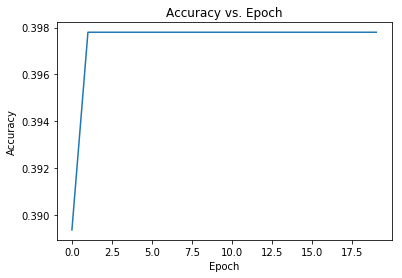

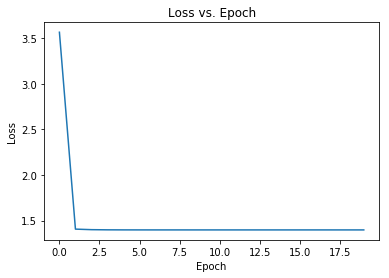

In [45]:
plt.plot(accuracy_history.history['acc'])
plt.title('Accuracy vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()
plt.plot(accuracy_history.history['loss'])
plt.title('Loss vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [46]:
score = model.evaluate(xtest_array, ytest_OHE, batch_size=128)
accuracy_rate = score[1]*100
print('accuracy is {}%'.format(round(accuracy_rate,2)))

20047/20047 [==============================] - 0s 13us/step
accuracy is 38.99%
